In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchsummary import summary #https://github.com/sksq96/pytorch-summary
torch.manual_seed(1234)
np.random.seed(1234)

In [9]:
n = 100 # Number of points
x_obs = np.expand_dims(np.linspace(-1,1,100), axis=-1)
y_obs = 1.4 * x_obs - 0.5 + 0.05 * np.random.randn(n,1)

(100, 1) (100, 1)


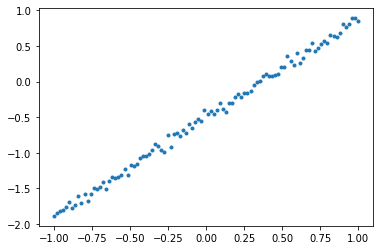

In [10]:
plt.plot(x_obs[:,0], y_obs[:,0], '.')
print(x_obs.shape, y_obs.shape)

In [11]:
class modelA(nn.Module):
    def __init__(self):
        super(modelA, self).__init__()
        self.linear = nn.Linear(1,1) #One layer with one neuron
    def forward(self, x):
        return self.linear(x) #The output is just the evaluation of the input


mod = modelA() #Our model 
summary(mod, input_size=(1, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [12]:
optimizer = torch.optim.Adam(mod.parameters(), lr=5e-2)
loss_fn = nn.MSELoss()

x_torch = torch.from_numpy(x_obs.astype('float32'))
y_torch = torch.from_numpy(y_obs.astype('float32'))

for loop in range(200):
    optimizer.zero_grad()        #reset gradients
    out = mod(x_torch)           #evaluate model
    loss = loss_fn(out, y_torch) #calculate loss
    loss.backward()              #calculate gradients
    optimizer.step()             #step fordward
    if loop%10==0: print(f' It : {loop:3d} - loss : {loss.item():.4f} - residual std : {np.sqrt(loss.item()):.4f}')

 It :   0 - loss : 2.5747 - residual std : 1.6046
 It :  10 - loss : 1.2501 - residual std : 1.1181
 It :  20 - loss : 0.5837 - residual std : 0.7640
 It :  30 - loss : 0.2873 - residual std : 0.5360
 It :  40 - loss : 0.1120 - residual std : 0.3346
 It :  50 - loss : 0.0303 - residual std : 0.1740
 It :  60 - loss : 0.0081 - residual std : 0.0898
 It :  70 - loss : 0.0027 - residual std : 0.0523
 It :  80 - loss : 0.0026 - residual std : 0.0506
 It :  90 - loss : 0.0027 - residual std : 0.0522
 It : 100 - loss : 0.0025 - residual std : 0.0504
 It : 110 - loss : 0.0024 - residual std : 0.0491
 It : 120 - loss : 0.0024 - residual std : 0.0485
 It : 130 - loss : 0.0024 - residual std : 0.0485
 It : 140 - loss : 0.0024 - residual std : 0.0485
 It : 150 - loss : 0.0024 - residual std : 0.0485
 It : 160 - loss : 0.0024 - residual std : 0.0485
 It : 170 - loss : 0.0024 - residual std : 0.0485
 It : 180 - loss : 0.0024 - residual std : 0.0485
 It : 190 - loss : 0.0024 - residual std : 0.0485


In [13]:
print(mod.linear.weight, mod.linear.bias)

Parameter containing:
tensor([[1.3888]], requires_grad=True) Parameter containing:
tensor([-0.5025], requires_grad=True)


(100, 1)


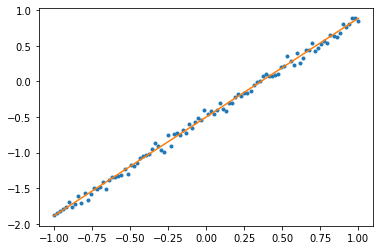

In [14]:
x_np = np.expand_dims(np.linspace(-1,1,100), axis=-1)
print(x_np.shape)
x = torch.from_numpy(x_np.astype('float32'))
out = mod(x)
out_np = out.detach().numpy()


plt.plot(x_obs[:,0], y_obs[:,0], '.')
plt.plot(x_np[:,0], out_np[:,0])